# Ridge Regression
The direct solution for Ridge Regression based on Sum of Squared Residuals with penalty term

$$
\hat{\theta} = (X^T \, X + \lambda\,I)^{-1} \, X^T\,y
$$

The hyperparameter $\lambda$ penalize the absolute value of an estimated parameter. 

* $\lambda = 0$ : it's simple linear regression
* $0 < \lambda < \infty$ : estimated parameters will shrink the larger $\lambda$
* $\lambda = \infty$ : paramters are zero


# Example

In [1]:
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
dpi=150

import numpy_linreg.metrics as metrics
import numpy_linreg.ridge as ridge
import numpy as np
np.random.seed(23)
from sklearn.model_selection import train_test_split
import scipy.stats

## Generate correlated random numbers

Both variables are standardized $Y\sim N(0,1)$ and $X \sim N(0,1)$.
Therefore, the regression model $y = \beta_0 = \beta_1 X + \epsilon$ 
should have an intercept $\beta_0 = 0$

In [3]:
n_obs = 1000
X = np.random.normal(loc=[0.0, 0.0], scale=[1.0, 1.0], size=(n_obs, 2))

Make it correlated with $\rho=.5$. 
Thus the regression coefficient should be estimated as $\beta_1 = 0.5$.

In [4]:
rho = .5
X[:, 1] = rho * X[:, 0] + np.sqrt(1.0 - rho**2) * X[:, 1]

A little check what $\rho$ can be computed from this fake dataset

In [5]:
rho, _ = scipy.stats.pearsonr(X[:, 0], X[:, 1])
print("Beta1 coefficient is expected to be: ", rho)

Beta1 coefficient is expected to be:  0.5148436623550902


## Data Splitting

Define `y` and `X` in python. Ones are added to `X` for the intercept estimation.

In [6]:
y = X[:, 0]
X = np.c_[np.ones((len(y),1)), X[:,1]]

## Performance on In-Sample (on training set)

If you compute an error function (e.g. RMSE) on the training sample or resp in-sample
then OLS or $\lambda=0$ will perform best. 
This is kind of expected as OLS fit the RMSE best by modeling assumptions.

../numpy_linreg/ridge.py:14: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 1d, A))
  return np.linalg.solve(P, np.dot(X.T, y))


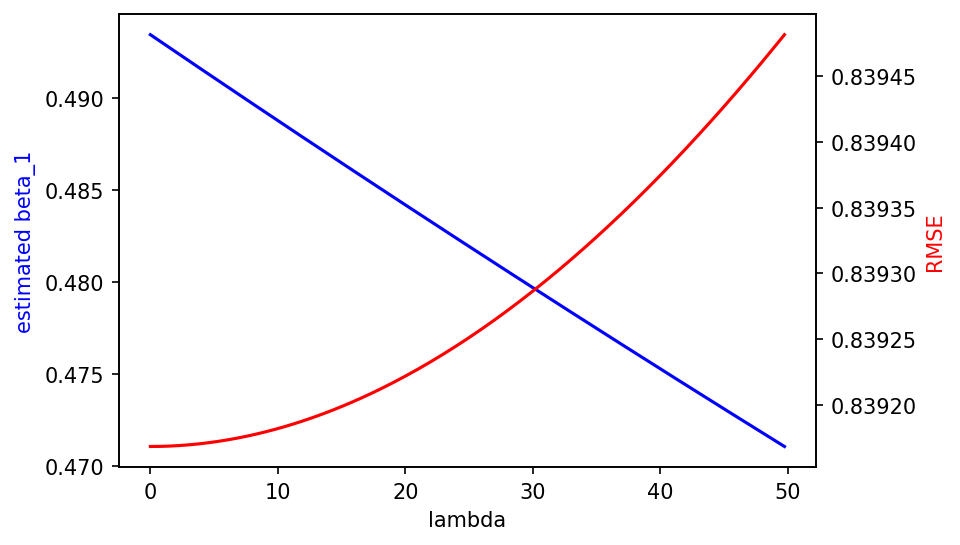

In [7]:
res = list()
for lam in np.arange(0, 50, 0.25):
    beta = ridge.lu(y, X, lam)
    rmse = metrics.rmse(y, X, beta)
    res.append((lam, beta[1], rmse))

res = np.array(res)
_,ax1 = plt.subplots(dpi=dpi)
ax1.plot(res[:,0], res[:,1], 'b-');
ax1.set_xlabel('lambda');
ax1.set_ylabel('estimated beta_1', color='b');
ax2 = ax1.twinx()
ax2.plot(res[:,0], res[:,2], 'r-');
ax2.set_ylabel('RMSE', color='r');

## Performance on out-of-sample (on test set)
However, this does not hold true in a two-way data split where the RMSE is computed on the out-of-sample set (validation set). There seems to exit an optimal 

$$
\lambda_{optimal} = \arg\min \, RMSE(\lambda)
$$ 

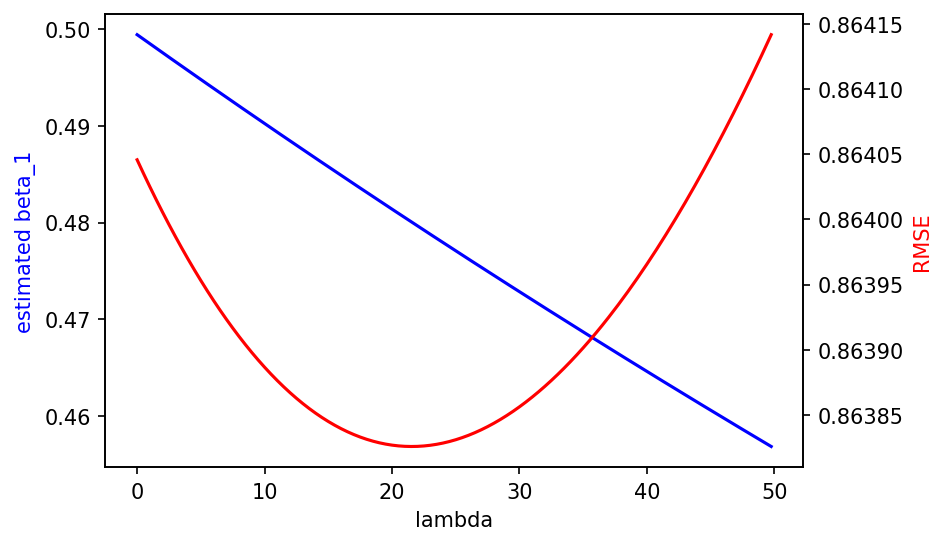

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

res = list()
for lam in np.arange(0, 50, 0.25):
    beta = ridge.lu(y_train, X_train, lam)
    rmse = metrics.rmse(y_test, X_test, beta)
    res.append((lam, beta[1], rmse))

res = np.array(res)
_,ax1 = plt.subplots(dpi=dpi)
ax1.plot(res[:,0], res[:,1], 'b-');
ax1.set_xlabel('lambda');
ax1.set_ylabel('estimated beta_1', color='b');
ax2 = ax1.twinx()
ax2.plot(res[:,0], res[:,2], 'r-');
ax2.set_ylabel('RMSE', color='r');